In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [151]:
result_file_path = '/Users/lan/per_aggregation_type_results.csv'

import pandas

result_df = pandas.read_csv(result_file_path)

In [152]:
result_groups = result_df.groupby(['error_level'])

In [153]:
recall = {}
precision = {}

for index, group in result_groups:
    if index not in recall:
        recall[index] = {}
    if index not in precision:
        precision[index] = {}
    
    recall_all = group['tp_count'] / (group['tp_count'] + group['fn_count'])
    precision_all = group['tp_count'] / (group['tp_count'] + group['fp_count'])
    
    recall[index]['all'] = recall_all.fillna(1)
    precision[index]['all'] = precision_all.fillna(1)
    
    recall[index]['sum'] = (group['sum_tp'] / (group['sum_tp'] + group['sum_fn'])).fillna(1)
    precision[index]['sum'] = (group['sum_tp'] / (group['sum_tp'] + group['sum_fp'])).fillna(1)
    
    recall[index]['average'] = (group['average_tp'] / (group['average_tp'] + group['average_fn'])).fillna(1)
    precision[index]['average'] = (group['average_tp'] / (group['average_tp'] + group['average_fp'])).fillna(1)
    
    recall[index]['division'] = (group['division_tp'] / (group['division_tp'] + group['division_fn'])).fillna(1)
    precision[index]['division'] = (group['division_tp'] / (group['division_tp'] + group['division_fp'])).fillna(1)
    
    recall[index]['relative_change'] = (group['relative_change_tp'] / (group['relative_change_tp'] + group['relative_change_fn'])).fillna(1)
    precision[index]['relative_change'] = (group['relative_change_tp'] / (group['relative_change_tp'] + group['relative_change_fp'])).fillna(1)

In [154]:
import numpy as np

intervals = np.linspace(0,1,6)

intervals

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [156]:
cumulated_recall_results = {}

for error_level, recall_results in recall.items():
    cumulated_recall_results[error_level] = {}
    for aggregation_type, results in recall_results.items():
        cumulated_recall_results[error_level][aggregation_type] = {}
        for interval in intervals:
            cumulated_recall_results[error_level][aggregation_type][interval] = len(results[results >= interval]) / len(results)

cumulated_precision_results = {}

for error_level, precision_results in precision.items():
    cumulated_precision_results[error_level] = {}
    for aggregation_type, results in precision_results.items():
        cumulated_precision_results[error_level][aggregation_type] = {}
        for interval in intervals:
            cumulated_precision_results[error_level][aggregation_type][interval] = len(results[results >= interval]) / len(results)

In [157]:
sum_precisions_by_el = [(k, v['sum']) for k, v in cumulated_precision_results.items()]
sum_recalls_by_el = [(k, v['sum']) for k, v in cumulated_recall_results.items()]

average_precisions_by_el = [(k, v['average']) for k, v in cumulated_precision_results.items()]
average_recalls_by_el = [(k, v['average']) for k, v in cumulated_recall_results.items()]

division_precisions_by_el = [(k, v['division']) for k, v in cumulated_precision_results.items()]
division_recalls_by_el = [(k, v['division']) for k, v in cumulated_recall_results.items()]

relative_change_precisions_by_el = [(k, v['relative_change']) for k, v in cumulated_precision_results.items()]
relative_change_recalls_by_el = [(k, v['relative_change']) for k, v in cumulated_recall_results.items()]

all_precisions_by_el = [(k, v['all']) for k, v in cumulated_precision_results.items()]
all_recalls_by_el = [(k, v['all']) for k, v in cumulated_recall_results.items()]

In [158]:
print(sum_precisions_by_el[0])
print(sum_recalls_by_el[0])

(0.0, {0.0: 1.0, 0.2: 0.987012987012987, 0.4: 0.9818181818181818, 0.6000000000000001: 0.9532467532467532, 0.8: 0.9402597402597402, 1.0: 0.8805194805194805})
(0.0, {0.0: 1.0, 0.2: 0.7324675324675325, 0.4: 0.6909090909090909, 0.6000000000000001: 0.5844155844155844, 0.8: 0.4883116883116883, 1.0: 0.38961038961038963})


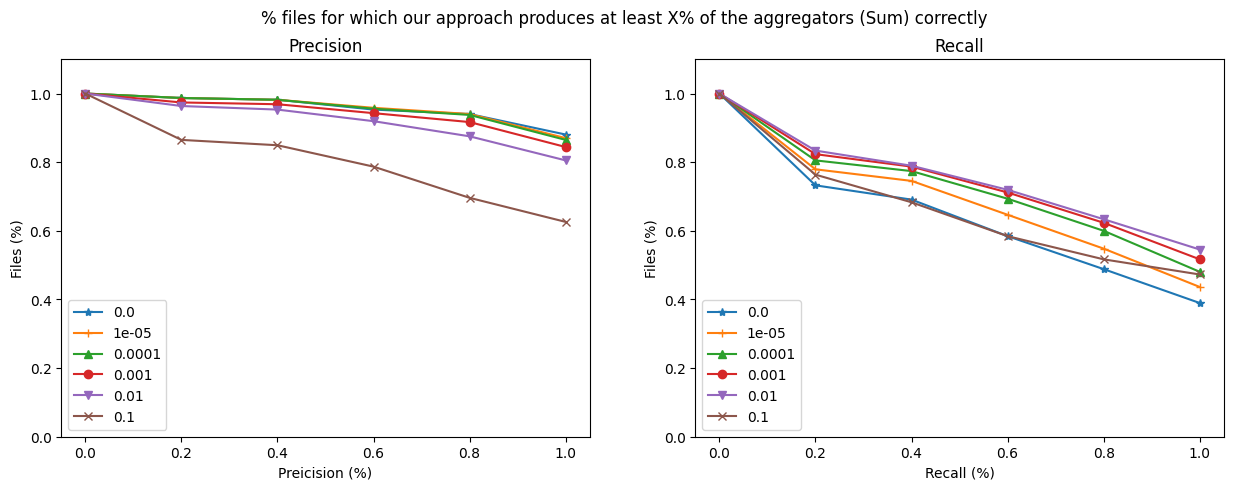

In [159]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 5])

ax1.plot(intervals, [v for v in sum_precisions_by_el[0][1].values()], marker='*', label = sum_precisions_by_el[0][0])
ax1.plot(intervals, [v for v in sum_precisions_by_el[1][1].values()], marker='+', label = sum_precisions_by_el[1][0])
ax1.plot(intervals, [v for v in sum_precisions_by_el[3][1].values()], marker='^', label = sum_precisions_by_el[3][0])
ax1.plot(intervals, [v for v in sum_precisions_by_el[5][1].values()], marker='o', label = sum_precisions_by_el[5][0])
ax1.plot(intervals, [v for v in sum_precisions_by_el[7][1].values()], marker='v', label = sum_precisions_by_el[7][0])
ax1.plot(intervals, [v for v in sum_precisions_by_el[9][1].values()], marker='x', label = sum_precisions_by_el[9][0])
ax1.set_xlabel('Preicision (%)')
ax1.set_ylabel('Files (%)')
ax1.set_ylim([0, 1.1])
ax1.legend(loc='lower left')
ax1.title.set_text('Precision')

ax2.plot(intervals, [v for v in sum_recalls_by_el[0][1].values()], marker='*', label = sum_recalls_by_el[0][0])
ax2.plot(intervals, [v for v in sum_recalls_by_el[1][1].values()], marker='+', label = sum_recalls_by_el[1][0])
ax2.plot(intervals, [v for v in sum_recalls_by_el[3][1].values()], marker='^', label = sum_recalls_by_el[3][0])
ax2.plot(intervals, [v for v in sum_recalls_by_el[5][1].values()], marker='o', label = sum_recalls_by_el[5][0])
ax2.plot(intervals, [v for v in sum_recalls_by_el[7][1].values()], marker='v', label = sum_recalls_by_el[7][0])
ax2.plot(intervals, [v for v in sum_recalls_by_el[9][1].values()], marker='x', label = sum_recalls_by_el[9][0])
ax2.set_xlabel('Recall (%)')
ax2.set_ylabel('Files (%)')
ax2.set_ylim([0, 1.1])
ax2.legend(loc='lower left')
ax2.title.set_text('Recall')

# Set a title of the current axes.
fig.suptitle('% files for which our approach produces at least X% of the aggregators (Sum) correctly')

plt.show()

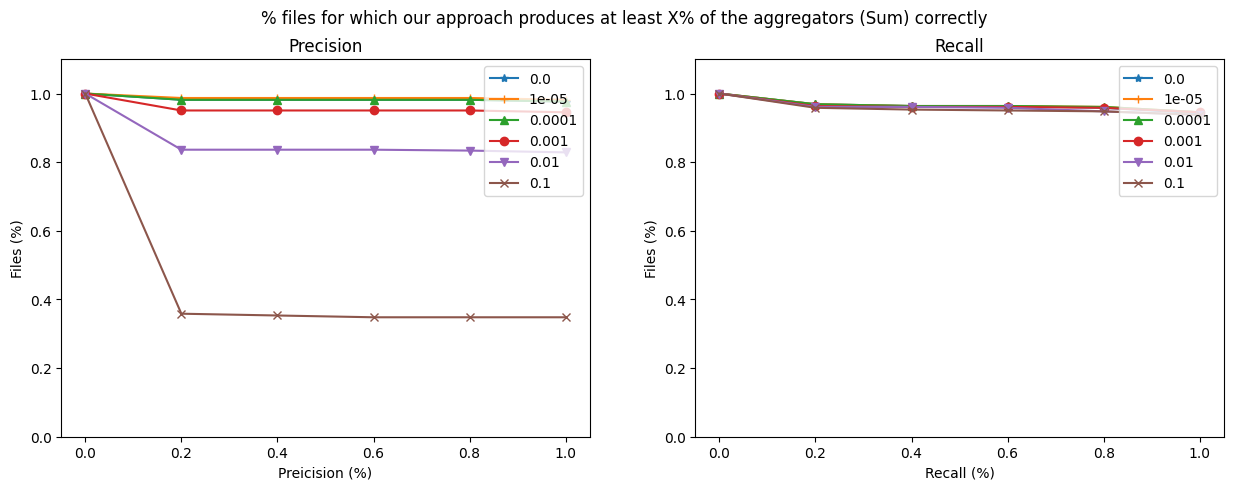

In [160]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 5])

ax1.plot(intervals, [v for v in average_precisions_by_el[0][1].values()], marker='*', label = average_precisions_by_el[0][0])
ax1.plot(intervals, [v for v in average_precisions_by_el[1][1].values()], marker='+', label = average_precisions_by_el[1][0])
ax1.plot(intervals, [v for v in average_precisions_by_el[3][1].values()], marker='^', label = average_precisions_by_el[3][0])
ax1.plot(intervals, [v for v in average_precisions_by_el[5][1].values()], marker='o', label = average_precisions_by_el[5][0])
ax1.plot(intervals, [v for v in average_precisions_by_el[7][1].values()], marker='v', label = average_precisions_by_el[7][0])
ax1.plot(intervals, [v for v in average_precisions_by_el[9][1].values()], marker='x', label = average_precisions_by_el[9][0])
ax1.set_xlabel('Preicision (%)')
ax1.set_ylabel('Files (%)')
ax1.set_ylim([0, 1.1])
ax1.legend(loc='upper right')
ax1.title.set_text('Precision')

ax2.plot(intervals, [v for v in average_recalls_by_el[0][1].values()], marker='*', label = average_recalls_by_el[0][0])
ax2.plot(intervals, [v for v in average_recalls_by_el[1][1].values()], marker='+', label = average_recalls_by_el[1][0])
ax2.plot(intervals, [v for v in average_recalls_by_el[3][1].values()], marker='^', label = average_recalls_by_el[3][0])
ax2.plot(intervals, [v for v in average_recalls_by_el[5][1].values()], marker='o', label = average_recalls_by_el[5][0])
ax2.plot(intervals, [v for v in average_recalls_by_el[7][1].values()], marker='v', label = average_recalls_by_el[7][0])
ax2.plot(intervals, [v for v in average_recalls_by_el[9][1].values()], marker='x', label = average_recalls_by_el[9][0])
ax2.set_xlabel('Recall (%)')
ax2.set_ylabel('Files (%)')
ax2.set_ylim([0, 1.1])
ax2.legend(loc='upper right')
ax2.title.set_text('Recall')

# Set a title of the current axes.
fig.suptitle('% files for which our approach produces at least X% of the aggregators (Sum) correctly')

plt.show()

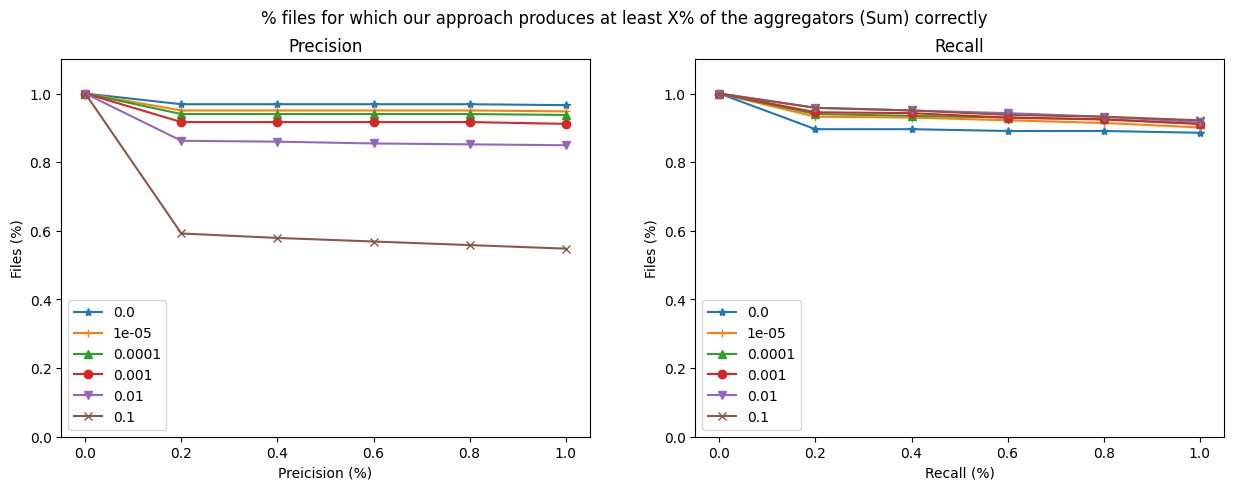

In [161]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 5])

ax1.plot(intervals, [v for v in division_precisions_by_el[0][1].values()], marker='*', label = division_precisions_by_el[0][0])
ax1.plot(intervals, [v for v in division_precisions_by_el[1][1].values()], marker='+', label = division_precisions_by_el[1][0])
ax1.plot(intervals, [v for v in division_precisions_by_el[3][1].values()], marker='^', label = division_precisions_by_el[3][0])
ax1.plot(intervals, [v for v in division_precisions_by_el[5][1].values()], marker='o', label = division_precisions_by_el[5][0])
ax1.plot(intervals, [v for v in division_precisions_by_el[7][1].values()], marker='v', label = division_precisions_by_el[7][0])
ax1.plot(intervals, [v for v in division_precisions_by_el[9][1].values()], marker='x', label = division_precisions_by_el[9][0])
ax1.set_xlabel('Preicision (%)')
ax1.set_ylabel('Files (%)')
ax1.set_ylim([0, 1.1])
ax1.legend(loc='lower left')
ax1.title.set_text('Precision')

ax2.plot(intervals, [v for v in division_recalls_by_el[0][1].values()], marker='*', label = division_recalls_by_el[0][0])
ax2.plot(intervals, [v for v in division_recalls_by_el[1][1].values()], marker='+', label = division_recalls_by_el[1][0])
ax2.plot(intervals, [v for v in division_recalls_by_el[3][1].values()], marker='^', label = division_recalls_by_el[3][0])
ax2.plot(intervals, [v for v in division_recalls_by_el[5][1].values()], marker='o', label = division_recalls_by_el[5][0])
ax2.plot(intervals, [v for v in division_recalls_by_el[7][1].values()], marker='v', label = division_recalls_by_el[7][0])
ax2.plot(intervals, [v for v in division_recalls_by_el[9][1].values()], marker='x', label = division_recalls_by_el[9][0])
ax2.set_xlabel('Recall (%)')
ax2.set_ylabel('Files (%)')
ax2.set_ylim([0, 1.1])
ax2.legend(loc='lower left')
ax2.title.set_text('Recall')

# Set a title of the current axes.
fig.suptitle('% files for which our approach produces at least X% of the aggregators (Sum) correctly')

plt.show()

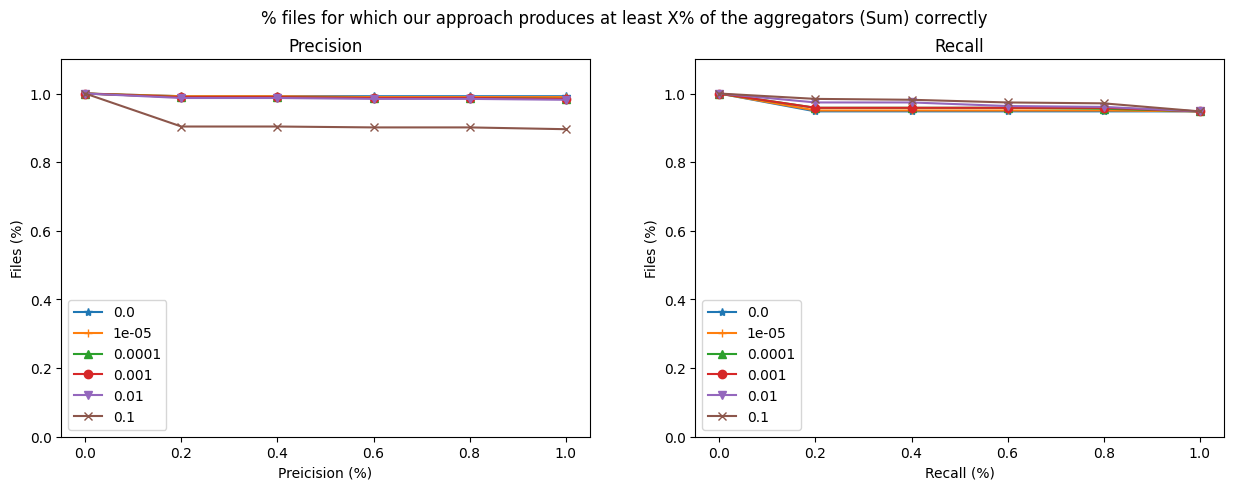

In [162]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 5])

ax1.plot(intervals, [v for v in relative_change_precisions_by_el[0][1].values()], marker='*', label = relative_change_precisions_by_el[0][0])
ax1.plot(intervals, [v for v in relative_change_precisions_by_el[1][1].values()], marker='+', label = relative_change_precisions_by_el[1][0])
ax1.plot(intervals, [v for v in relative_change_precisions_by_el[3][1].values()], marker='^', label = relative_change_precisions_by_el[3][0])
ax1.plot(intervals, [v for v in relative_change_precisions_by_el[5][1].values()], marker='o', label = relative_change_precisions_by_el[5][0])
ax1.plot(intervals, [v for v in relative_change_precisions_by_el[7][1].values()], marker='v', label = relative_change_precisions_by_el[7][0])
ax1.plot(intervals, [v for v in relative_change_precisions_by_el[9][1].values()], marker='x', label = relative_change_precisions_by_el[9][0])
ax1.set_xlabel('Preicision (%)')
ax1.set_ylabel('Files (%)')
ax1.set_ylim([0, 1.1])
ax1.legend(loc='lower left')
ax1.title.set_text('Precision')

ax2.plot(intervals, [v for v in relative_change_recalls_by_el[0][1].values()], marker='*', label = relative_change_recalls_by_el[0][0])
ax2.plot(intervals, [v for v in relative_change_recalls_by_el[1][1].values()], marker='+', label = relative_change_recalls_by_el[1][0])
ax2.plot(intervals, [v for v in relative_change_recalls_by_el[3][1].values()], marker='^', label = relative_change_recalls_by_el[3][0])
ax2.plot(intervals, [v for v in relative_change_recalls_by_el[5][1].values()], marker='o', label = relative_change_recalls_by_el[5][0])
ax2.plot(intervals, [v for v in relative_change_recalls_by_el[7][1].values()], marker='v', label = relative_change_recalls_by_el[7][0])
ax2.plot(intervals, [v for v in relative_change_recalls_by_el[9][1].values()], marker='x', label = relative_change_recalls_by_el[9][0])
ax2.set_xlabel('Recall (%)')
ax2.set_ylabel('Files (%)')
ax2.set_ylim([0, 1.1])
ax2.legend(loc='lower left')
ax2.title.set_text('Recall')

# Set a title of the current axes.
fig.suptitle('% files for which our approach produces at least X% of the aggregators (Sum) correctly')

plt.show()

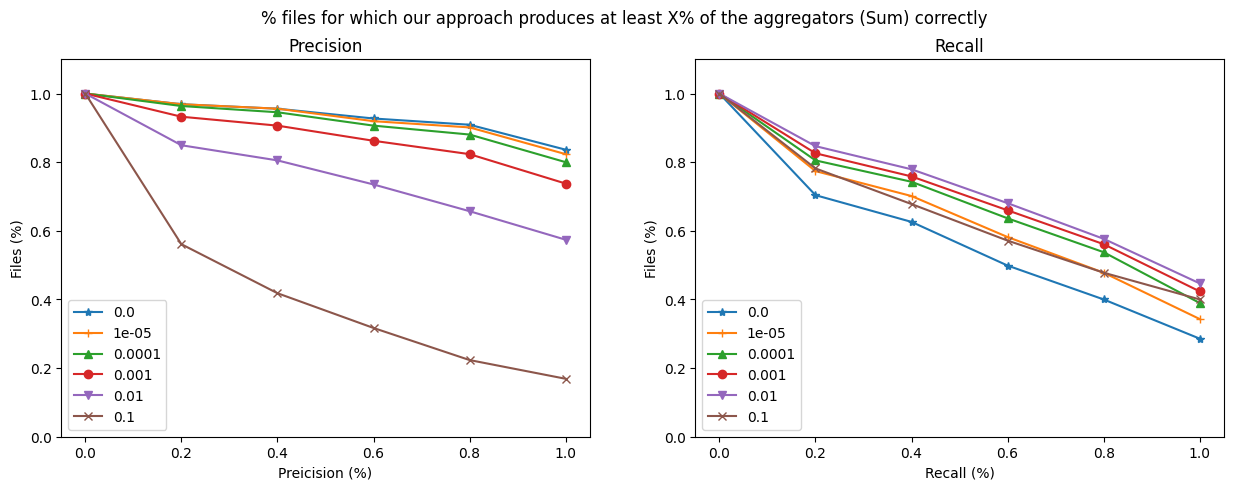

In [163]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 5])

ax1.plot(intervals, [v for v in all_precisions_by_el[0][1].values()], marker='*', label = all_precisions_by_el[0][0])
ax1.plot(intervals, [v for v in all_precisions_by_el[1][1].values()], marker='+', label = all_precisions_by_el[1][0])
ax1.plot(intervals, [v for v in all_precisions_by_el[3][1].values()], marker='^', label = all_precisions_by_el[3][0])
ax1.plot(intervals, [v for v in all_precisions_by_el[5][1].values()], marker='o', label = all_precisions_by_el[5][0])
ax1.plot(intervals, [v for v in all_precisions_by_el[7][1].values()], marker='v', label = all_precisions_by_el[7][0])
ax1.plot(intervals, [v for v in all_precisions_by_el[9][1].values()], marker='x', label = all_precisions_by_el[9][0])
ax1.set_xlabel('Preicision (%)')
ax1.set_ylabel('Files (%)')
ax1.set_ylim([0, 1.1])
ax1.legend(loc='lower left')
ax1.title.set_text('Precision')

ax2.plot(intervals, [v for v in all_recalls_by_el[0][1].values()], marker='*', label = all_recalls_by_el[0][0])
ax2.plot(intervals, [v for v in all_recalls_by_el[1][1].values()], marker='+', label = all_recalls_by_el[1][0])
ax2.plot(intervals, [v for v in all_recalls_by_el[3][1].values()], marker='^', label = all_recalls_by_el[3][0])
ax2.plot(intervals, [v for v in all_recalls_by_el[5][1].values()], marker='o', label = all_recalls_by_el[5][0])
ax2.plot(intervals, [v for v in all_recalls_by_el[7][1].values()], marker='v', label = all_recalls_by_el[7][0])
ax2.plot(intervals, [v for v in all_recalls_by_el[9][1].values()], marker='x', label = all_recalls_by_el[9][0])
ax2.set_xlabel('Recall (%)')
ax2.set_ylabel('Files (%)')
ax2.set_ylim([0, 1.1])
ax2.legend(loc='lower left')
ax2.title.set_text('Recall')

# Set a title of the current axes.
fig.suptitle('% files for which our approach produces at least X% of the aggregators (Sum) correctly')

plt.show()